In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd
df=pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
360,21,Male,Single,Student,No Income,Graduate,5,12.9783,77.6408,560038,Yes,Positive,Yes
95,25,Male,Single,Student,No Income,Graduate,1,12.9770,77.5773,560009,Yes,Positive,Yes
352,29,Female,Married,Employee,25001 to 50000,Graduate,4,12.9783,77.6408,560038,No,Positive,No
248,31,Male,Prefer not to say,Employee,Below Rs.10000,Graduate,1,12.9866,77.4904,560091,No,Negative,No


In [5]:
df.duplicated().sum()

103

In [6]:
duplicates=df[df.duplicated()]
duplicates

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
43,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
48,23,Female,Single,Student,No Income,Graduate,3,12.9820,77.6256,560008,Yes,Negative,Yes
49,22,Female,Single,Student,10001 to 25000,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
52,24,Male,Single,Student,No Income,Post Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
60,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes


In [7]:
df=df.drop_duplicates().copy().reset_index()
df

,index,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,355,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
281,363,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
282,369,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
283,374,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes


In [8]:
df=df.drop(['index'],axis=1).copy()
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
281,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
282,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
283,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes


In [9]:
df.select_dtypes(include='number').corr()

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.212541,0.048413,0.032969,0.051374
Family size,0.212541,1.000000,-0.048674,0.060691,0.015686
latitude,0.048413,-0.048674,1.000000,-0.147992,-0.231334
longitude,0.032969,0.060691,-0.147992,1.000000,0.136400
Pin code,0.051374,0.015686,-0.231334,0.136400,1.000000


In [10]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,24.677193,3.270175,12.973429,77.597593,560037.280702
std,3.040977,1.361178,0.043964,0.053557,30.738306
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.943800,77.563500,560010.000000
50%,24.000000,3.000000,12.977000,77.587700,560028.000000
75%,26.000000,4.000000,12.998000,77.622700,560066.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Gender', ylabel='count'>

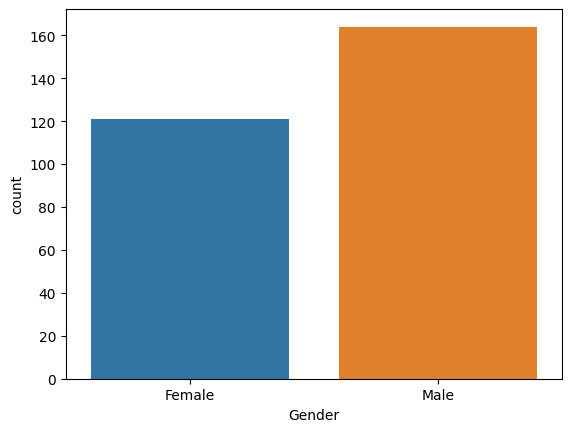

In [13]:
sns.countplot(data=df,x='Gender')

<Axes: xlabel='Marital Status', ylabel='count'>

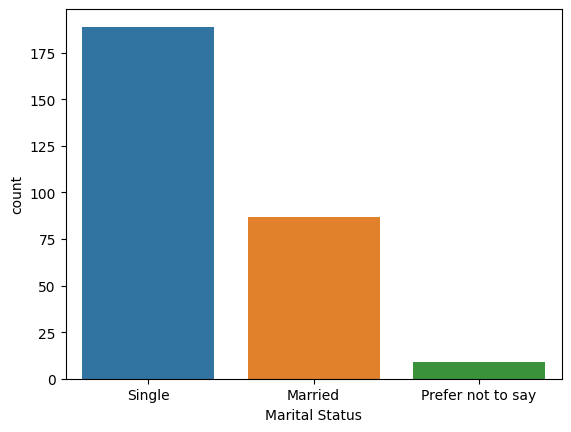

In [14]:
sns.countplot(data=df,x='Marital Status')

/tmp/ipykernel_18/3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

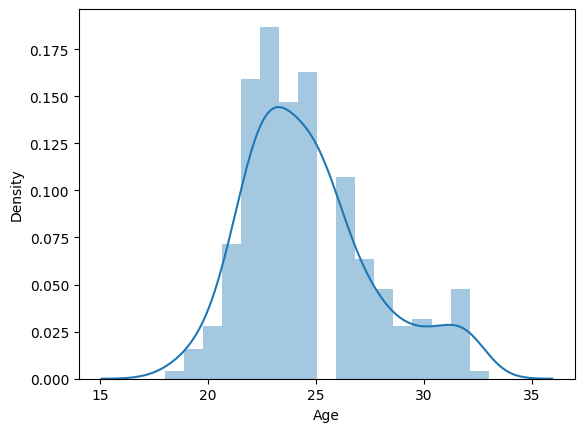

In [15]:
sns.distplot(df['Age'])

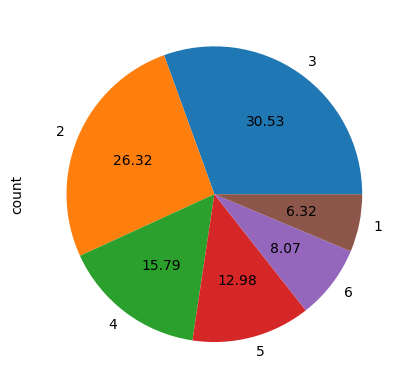

In [16]:
df['Family size'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

<Axes: >

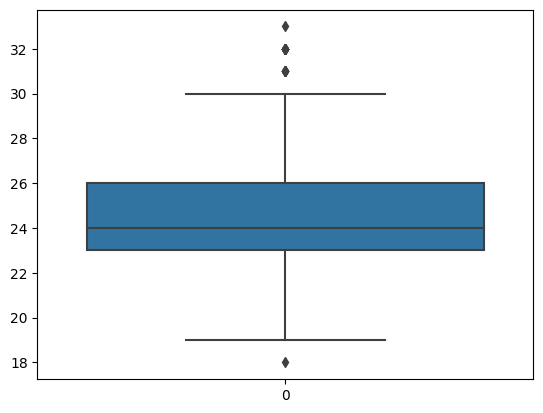

In [17]:
sns.boxplot(df["Age"])

<Axes: xlabel='Feedback', ylabel='count'>

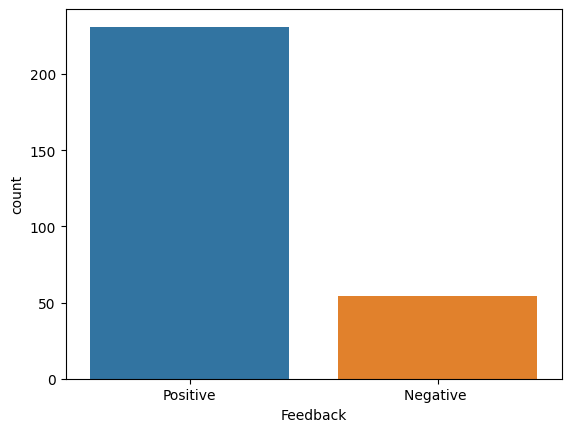

In [18]:
sns.countplot(data=df,x='Feedback')

In [19]:
df["Age"].skew()

0.7430766506943454

In [20]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,21,Male,Single,Student,No Income,Graduate,2,13.0012,77.5995,560046,No,Positive,No
281,31,Male,Married,Employee,More than 50000,Ph.D,3,12.9306,77.5434,560085,Yes,Positive,Yes
282,30,Male,Married,Employee,More than 50000,Post Graduate,6,12.9369,77.6407,560095,Yes,Positive,Yes
283,21,Male,Single,Student,No Income,Graduate,3,13.0641,77.5931,560092,Yes,Negative,Yes


<Axes: xlabel='Family size', ylabel='Age'>

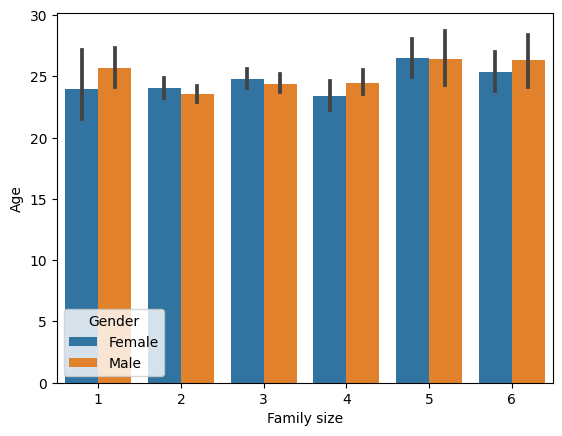

In [21]:
sns.barplot(data=df,x='Family size',y="Age",hue='Gender')

<Axes: xlabel='Gender', ylabel='Age'>

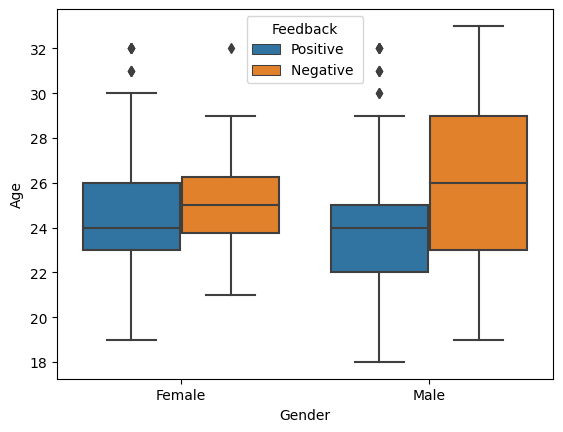

In [22]:
sns.boxplot(data=df,x='Gender',y='Age',hue='Feedback')

<Axes: xlabel='Output', ylabel='Monthly Income'>

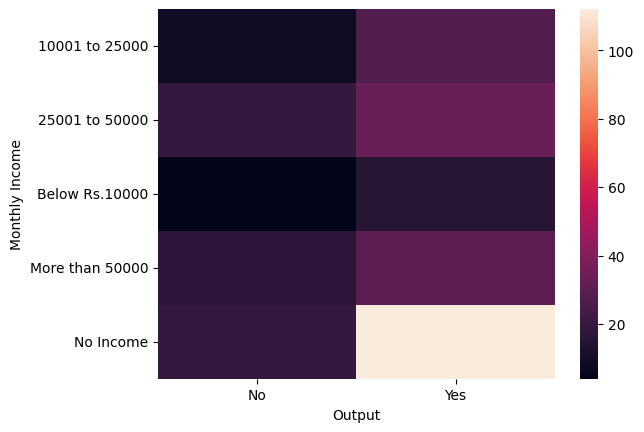

In [23]:
sns.heatmap(pd.crosstab(df["Monthly Income"],df['Output']))

<Axes: xlabel='Output', ylabel='Feedback'>

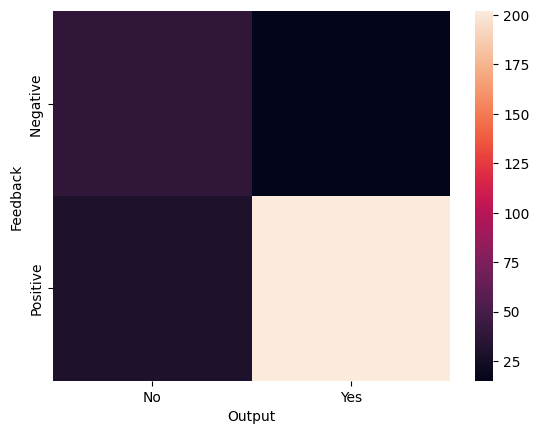

In [24]:
sns.heatmap(pd.crosstab(df["Feedback"],df['Output']))

<Axes: xlabel='Pin code', ylabel='count'>

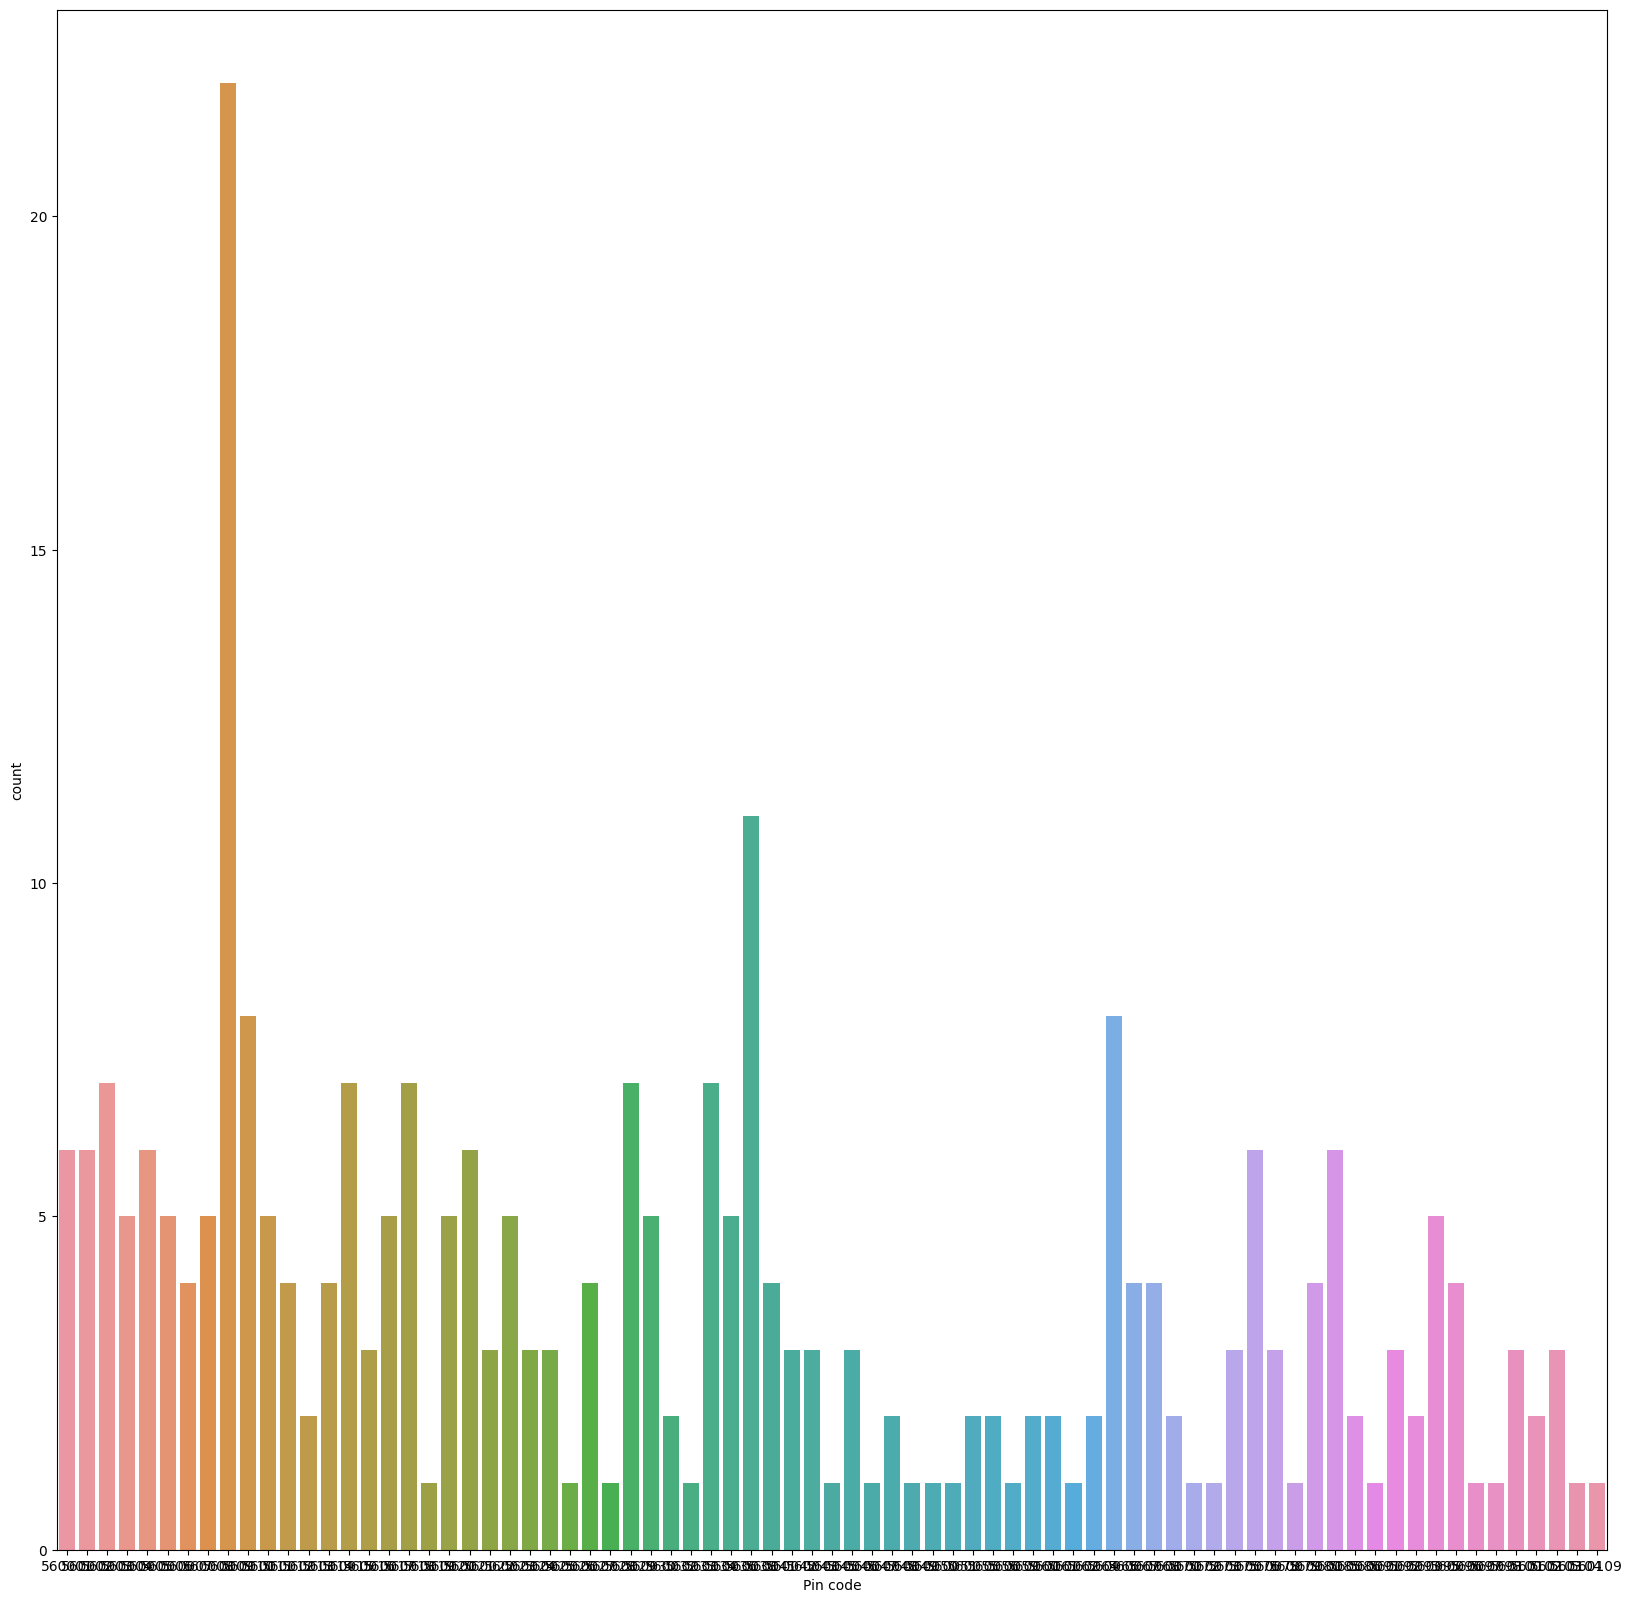

In [25]:
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='Pin code')

In [26]:
dfp=df.query("Age>25 & Output=='Yes'")
dfp

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
16,28,Female,Single,Employee,25001 to 50000,Post Graduate,2,12.9783,77.6408,560038,Yes,Positive,Yes
37,32,Female,Prefer not to say,House wife,No Income,Graduate,5,12.9820,77.6256,560008,Yes,Negative,Yes
40,30,Male,Married,Self Employeed,More than 50000,Uneducated,4,12.9662,77.6068,560025,Yes,Negative,Yes
44,27,Female,Married,Self Employeed,10001 to 25000,Post Graduate,2,12.9261,77.6221,560034,Yes,Positive,Yes
51,28,Female,Married,Student,No Income,Graduate,2,13.0067,77.5450,560086,Yes,Positive,Yes
54,31,Male,Married,Employee,More than 50000,Ph.D,5,12.9119,77.6446,560102,Yes,Positive,Yes
68,26,Male,Single,Student,No Income,Post Graduate,4,13.0019,77.5713,560003,Yes,Positive,Yes
70,26,Male,Single,Student,No Income,Post Graduate,4,12.9048,77.6821,560036,Yes,Positive,Yes
90,26,Male,Single,Employee,25001 to 50000,Graduate,2,12.9261,77.6221,560034,Yes,Negative,Yes


In [27]:
res=dfp.groupby("Gender").size()
res

Gender
Female    21
Male      30
dtype: int64

<Axes: xlabel='Gender'>

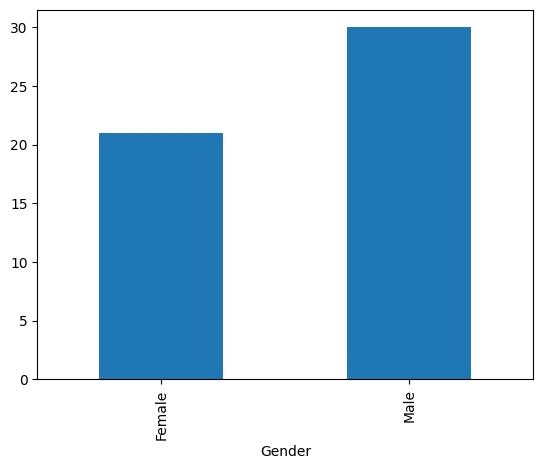

In [28]:
res.plot(kind='bar',x="Gender",y='Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

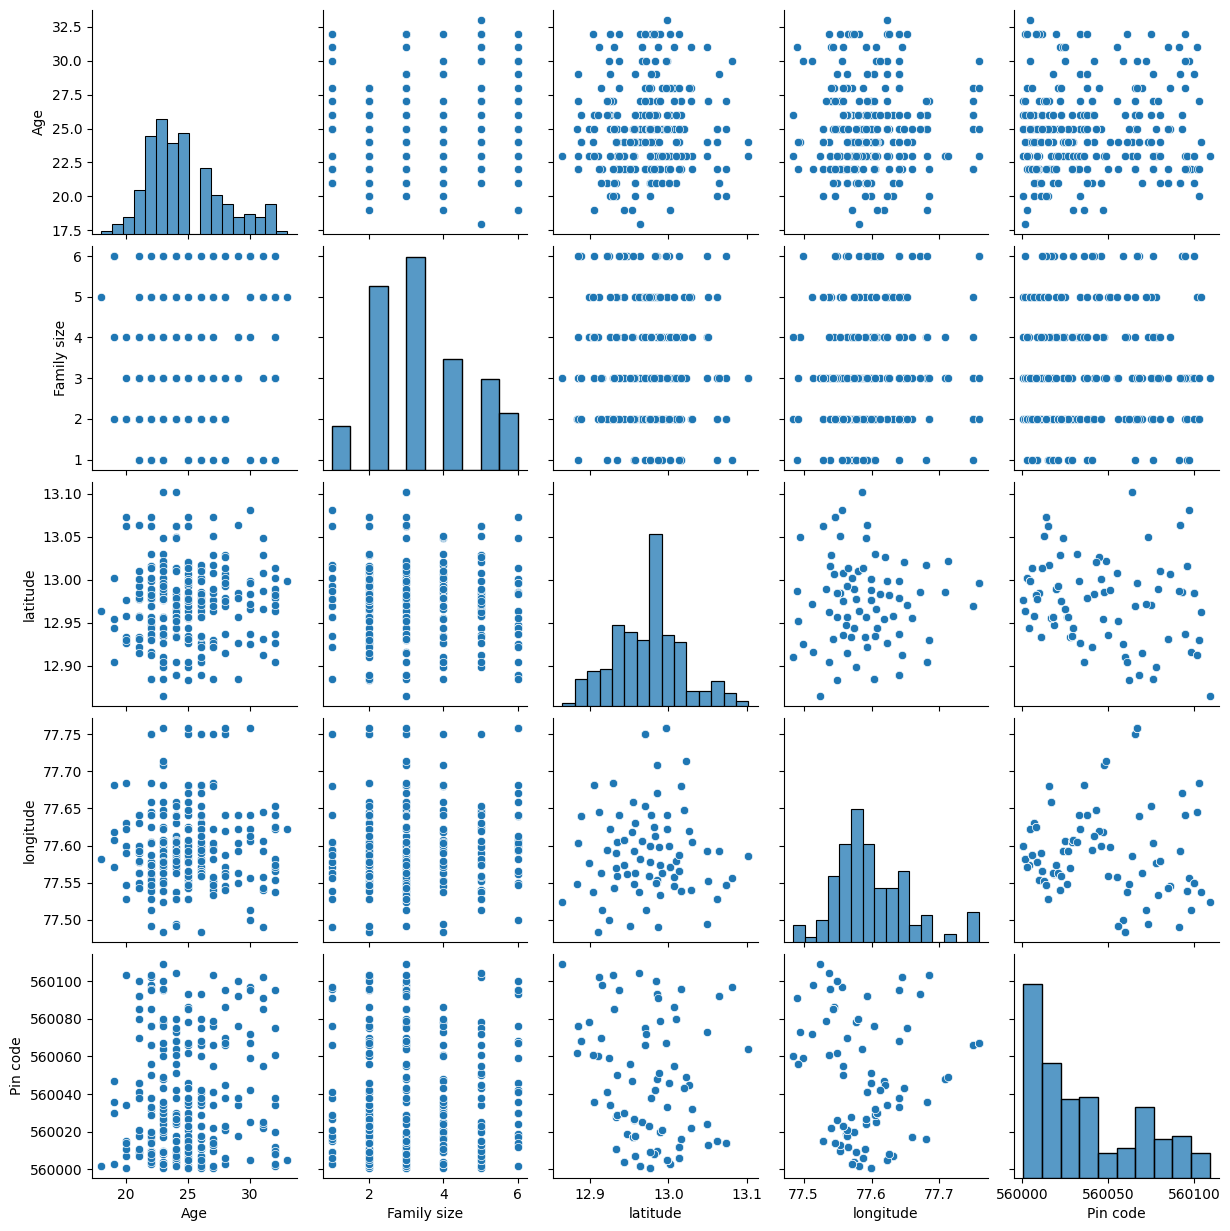

In [29]:
sns.pairplot(df)